In [0]:
cd /content/drive/My Drive/Client/Godzwill/New_datasets

/content/drive/My Drive/Client/Godzwill/New_datasets


In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('/content/drive/My Drive/Client/Godzwill/New_datasets/covid_19_clean_complete.csv')

In [0]:
df1=pd.read_csv('/content/drive/My Drive/Client/Godzwill/New_datasets/usa_county_wise.csv')

In [0]:
df.head(200)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
195,NaN,Seychelles,-4.6796,55.4920,1/22/20,0,0,0
196,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0
197,NaN,Slovakia,48.6690,19.6990,1/22/20,0,0,0
198,NaN,Slovenia,46.1512,14.9955,1/22/20,0,0,0


In [0]:
df1

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",1/22/20,0,0
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",1/22/20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339139,84070016.0,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",5/4/20,25,0
339140,84070017.0,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",5/4/20,11,0
339141,84070018.0,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",5/4/20,119,2
339142,84070019.0,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",5/4/20,14,0


In [0]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from fbprophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [0]:
#Converting "Observation Date" into Datetime format
df["Date"]=pd.to_datetime(df["Date"])

#Worldwide Analysis

In [0]:
#Grouping different types of cases as per the date
datewise=df.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [0]:
from datetime import date

x = date.today()

x.strftime("%b %d %Y")
today = x.strftime("%d-%m-%Y")
#today

In [0]:
print("Basic information about COVID-19 in the world on the day " + str(today) +".")
print(" ")

print("Contaminated countries                           :   ",len(df["Country/Region"].unique()))
print("Confirmed cases worldwide             :  {:.0f} ".format(datewise["Confirmed"].iloc[-1]))
print("Recoveries around the world                  :  {:.0f}".format(datewise["Recovered"].iloc[-1]))
print("COVID-19 deaths worldwide           :   {:.0f}".format(datewise["Deaths"].iloc[-1]))
print("Active cases worldwide                  : ",int((datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1])))
print("Cases closed in the world                   : ",int(datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))

print(" ")

print("Confirmed cases per day worldwide     :  ",int(np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0])))
print("Daily recoveries worldwide          :   ",int(np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0])))
print("COVID-19 deaths per day around the world :    ",int(np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0])))
print("Hourly confirmed cases worldwide    :    ",int(np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24))))
print("Hourly recoveries worldwide         :    ",int(np.round(datewise["Recovered"].iloc[-1]/((datewise.shape[0])*24))))
print("COVID-19 deaths per hour worldwide  :     ",int(np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24))))

print(" ")

print("Acknowledgments:")
print("We are grateful to WHO and Johns Hopkins University for the data available to")
print("educational and academic research purposes - Jair Ribeiro")

Basic information about COVID-19 in the world on the day 05-05-2020.
 
Contaminated countries                           :    187
Confirmed cases worldwide             :  3583049 
Recoveries around the world                  :  1129072
COVID-19 deaths worldwide           :   251537
Active cases worldwide                  :  2202440
Cases closed in the world                   :  1380609
 
Confirmed cases per day worldwide     :   34452
Daily recoveries worldwide          :    10856
COVID-19 deaths per day around the world :     2419
Hourly confirmed cases worldwide    :     1436
Hourly recoveries worldwide         :     452
COVID-19 deaths per hour worldwide  :      101
 
Acknowledgments:
We are grateful to WHO and Johns Hopkins University for the data available to
educational and academic research purposes - Jair Ribeiro


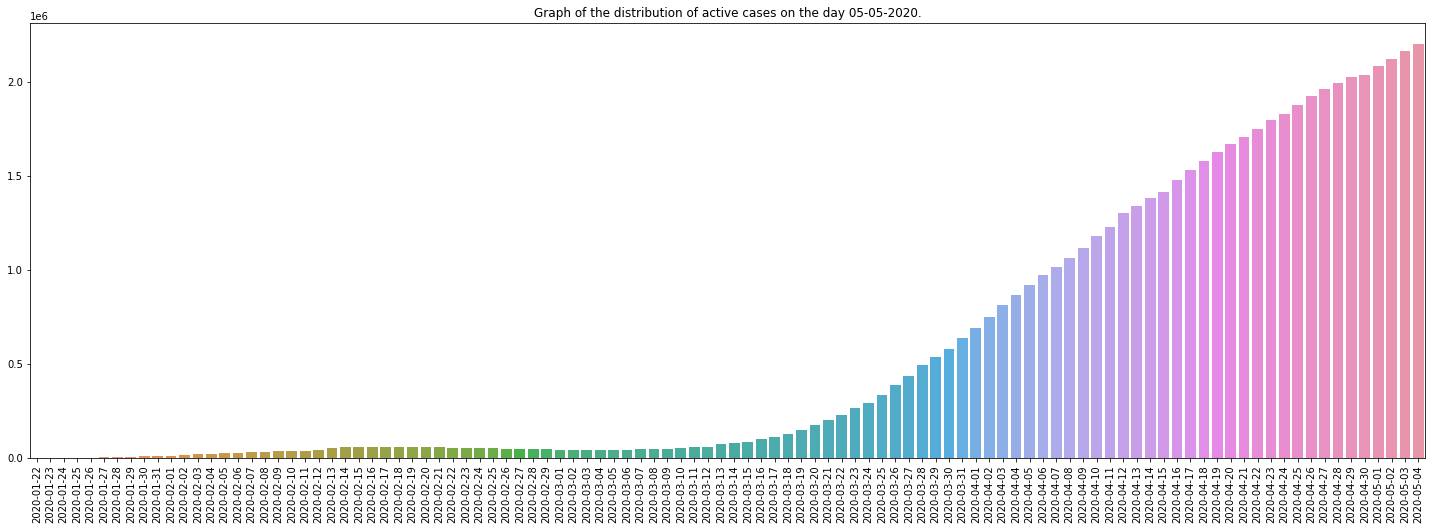

In [0]:
plt.figure(figsize=(25,8))
sns.barplot(x=datewise.index.date, y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Graph of the distribution of active cases on the day " + str(today) +".")
plt.xticks(rotation=90)

plt.savefig('001br.png')

Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases
Increase in number of Active Cases is probably an indication of Recovered case or Death case number is dropping in comparison to number of Confirmed Cases drastically. Will look for the conclusive evidence for the same in the notebook ahead

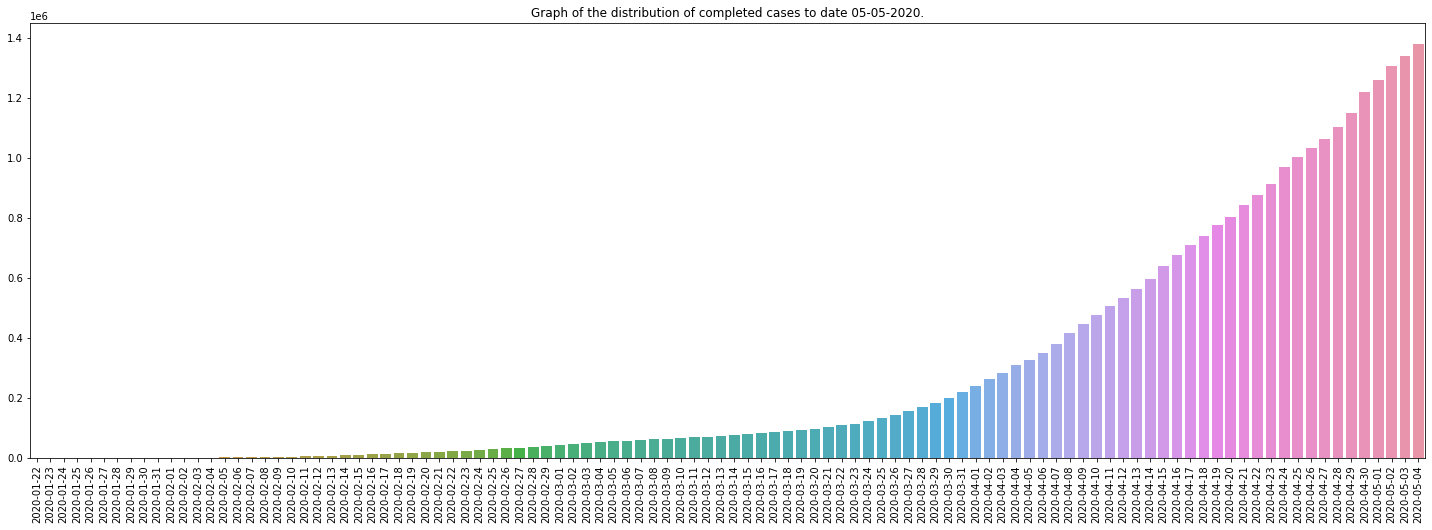

In [0]:
plt.figure(figsize=(25,8))
sns.barplot(x=datewise.index.date, y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Graph of the distribution of completed cases to date " + str(today) +".")
plt.xticks(rotation=90)
plt.savefig('002br.png')

Closed Cases = Number of Recovered Cases + Number of Death Cases
Increase in number of Closed classes imply either more patients are getting recovered from the disease or more people are dying because of COVID-19

<function matplotlib.pyplot.xlabel>

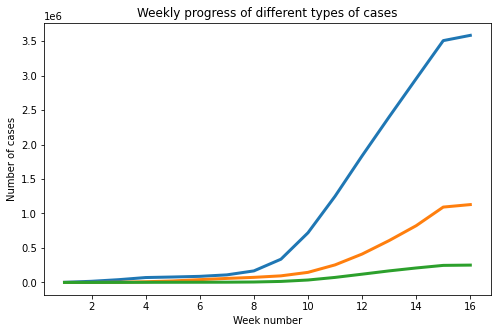

In [0]:
datewise["WeekOfYear"]=datewise.index.weekofyear

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1

plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.ylabel("Number of cases")
plt.xlabel("Week number")
plt.title("Weekly progress of different types of cases")
plt.xlabel

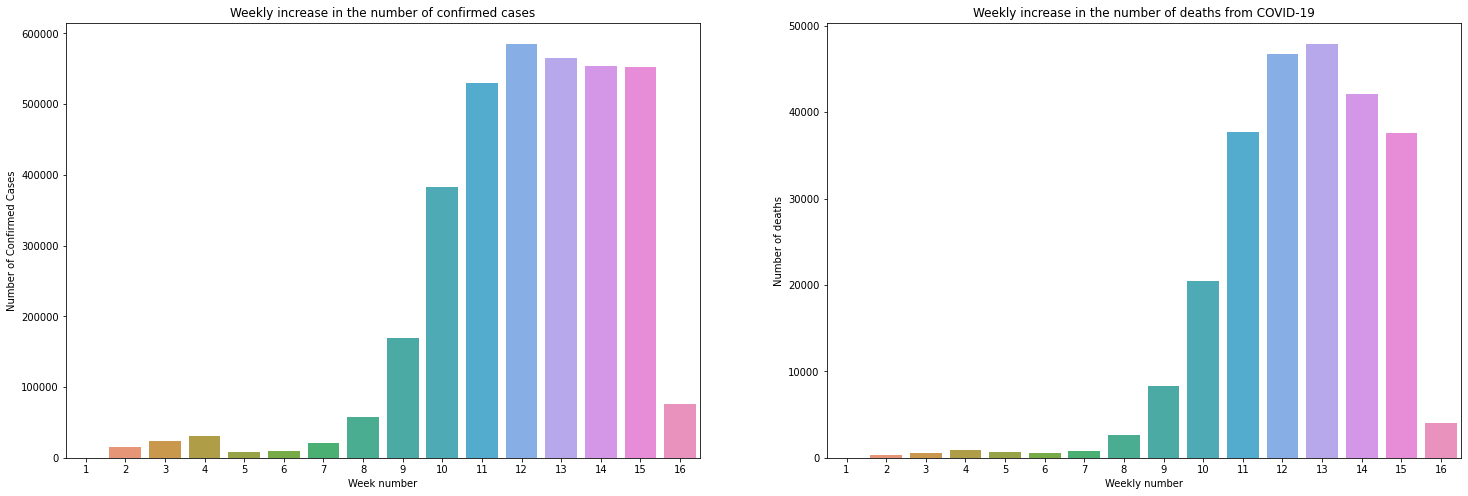

In [0]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(25,8))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week number")
ax2.set_xlabel("Weekly number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of deaths")
ax1.set_title("Weekly increase in the number of confirmed cases")
ax2.set_title("Weekly increase in the number of deaths from COVID-19")
plt.savefig('003br.png')


Growth rate of Confirmed, Recovered and Death Cases

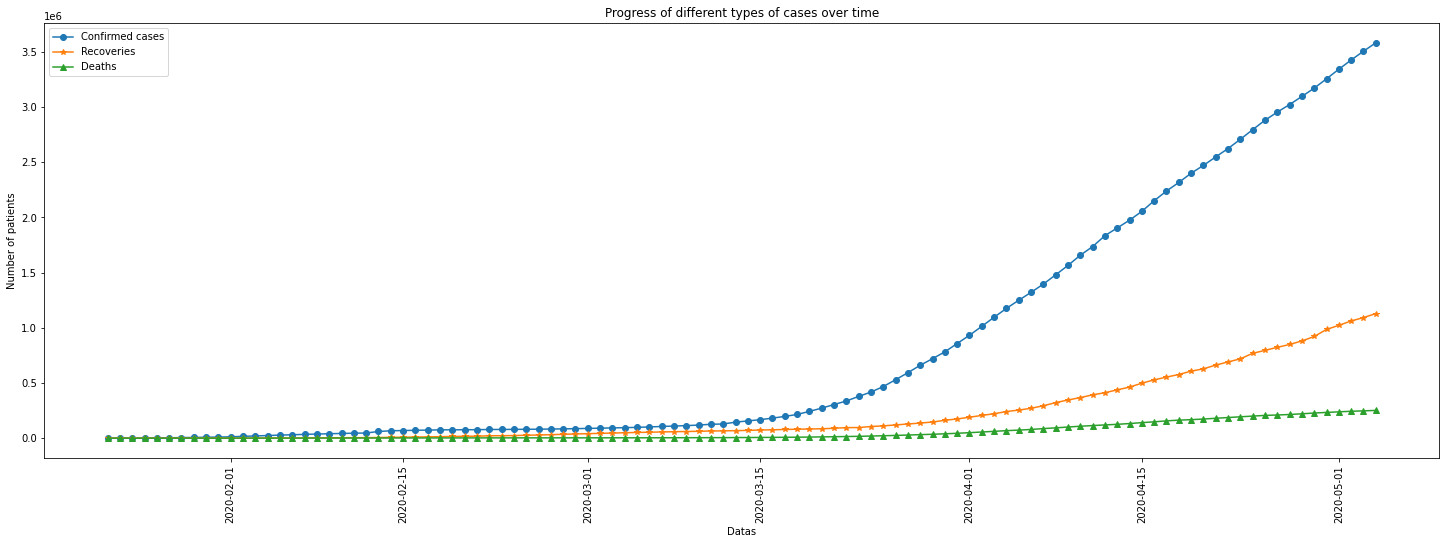

In [0]:
plt.figure(figsize=(25,8))
plt.plot(datewise["Confirmed"],marker="o",label="Confirmed cases")
plt.plot(datewise["Recovered"],marker="*",label="Recoveries")
plt.plot(datewise["Deaths"],marker="^",label="Deaths")
plt.ylabel("Number of patients")
plt.xlabel("Datas")
plt.xticks(rotation=90)
plt.title("Progress of different types of cases over time")
plt.legend()
plt.savefig('004br.png')

Mortality and Recovery Rate analysis around the World

The median of a set of numbers is that number where half of the numbers is less and half of the numbers is greater. ... The average of a set of numbers is the total of those numbers divided by the number of items in that set. The median and average can be close, but they can also be significantly different.

Average Mortality     :  4.37
Median Mortality      :  3.73
Average Recovery Rate : 24.68
Median Recovery      :  24.02


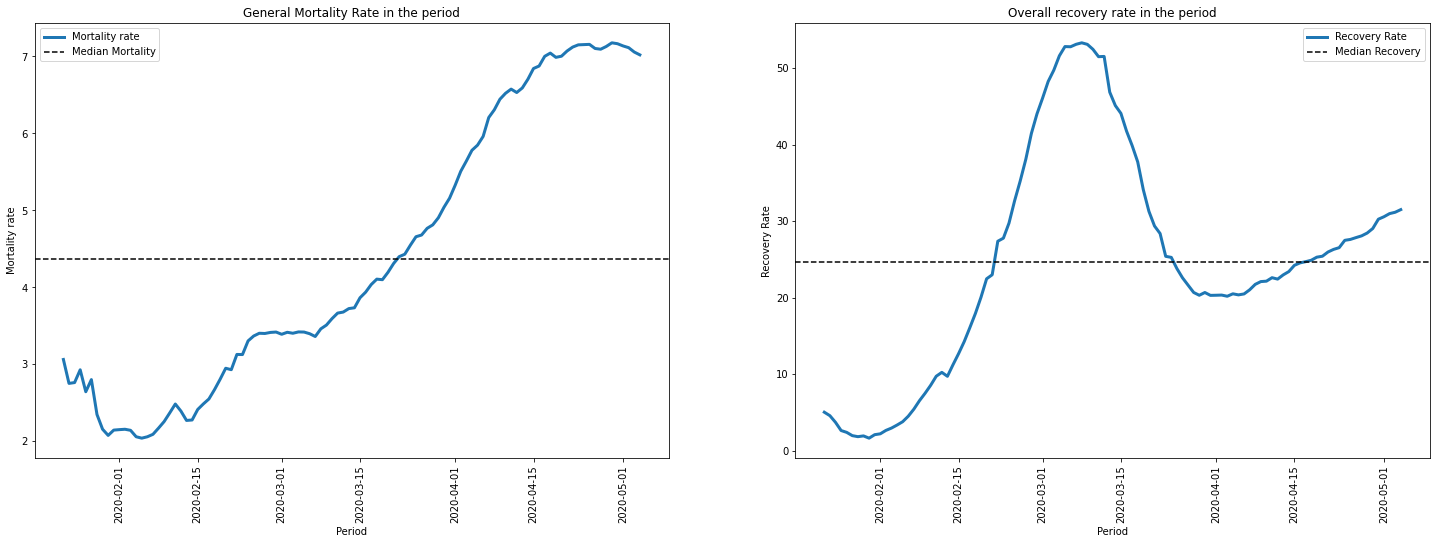

In [0]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

#Plotting Mortality and Recovery Rate 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,8))
ax1.plot(datewise["Mortality Rate"],label='Mortality rate',linewidth=3)
ax1.axhline(datewise["Mortality Rate"].mean(),linestyle='--',color='black',label="Median Mortality")
ax1.set_ylabel("Mortality rate")
ax1.set_xlabel("Period")
ax1.set_title("General Mortality Rate in the period")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise["Recovery Rate"],label="Recovery Rate",linewidth=3)
ax2.axhline(datewise["Recovery Rate"].mean(),linestyle='--',color='black',label="Median Recovery")
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Period")
ax2.set_title("Overall recovery rate in the period")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
    

precision = 2
#print( "{:.{}f}".format( pi, precision )) 

print( "Average Mortality     :  {:.{}f}".format( datewise["Mortality Rate"].mean(), precision )) 
print( "Median Mortality      :  {:.{}f}".format( datewise["Mortality Rate"].median(), precision ))     
print( "Average Recovery Rate : {:.{}f}".format( datewise["Recovery Rate"].mean(), precision )) 
print( "Median Recovery      :  {:.{}f}".format( datewise["Recovery Rate"].median(), precision ))

plt.savefig('005br.png')

Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100
Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100
Mortality rate increment is pretty significant along with drastic drop in recovery rate falling even below the average Recovery Rate around the World. That's a conclusive evidence why number of Active Cases are rising, also there is increase in number of Closed Cases as the mortality rate is a clear indication of increase number of Death Cases
Growth Factor
Growth factor is the factor by which a quantity multiplies itself over time. The formula used is:

Formula: Every day's new (Confirmed,Recovered,Deaths) / new (Confirmed,Recovered,Deaths) on the previous day.

A growth factor above 1 indicates an increase correspoding cases.

A growth factor above 1 but trending downward is a positive sign, whereas a growth factor constantly above 1 is the sign of exponential growth.

A growth factor constant at 1 indicates there is no change in any kind of cases.

In [0]:
daily_increase_confirm=[]
daily_increase_recovered=[]
daily_increase_deaths=[]
for i in range(datewise.shape[0]-1):
    daily_increase_confirm.append(((datewise["Confirmed"].iloc[i+1]/datewise["Confirmed"].iloc[i])))
    daily_increase_recovered.append(((datewise["Recovered"].iloc[i+1]/datewise["Recovered"].iloc[i])))
    daily_increase_deaths.append(((datewise["Deaths"].iloc[i+1]/datewise["Deaths"].iloc[i])))
daily_increase_confirm.insert(0,1)
daily_increase_recovered.insert(0,1)
daily_increase_deaths.insert(0,1)

Growth Factor constantly above 1 is an clear indication of Exponential increase in all form of cases.

#Countrywise Analysis

In [0]:
#Calculating countrywise Moratality and Recovery Rate
countrywise=df[df["Date"]==df["Date"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

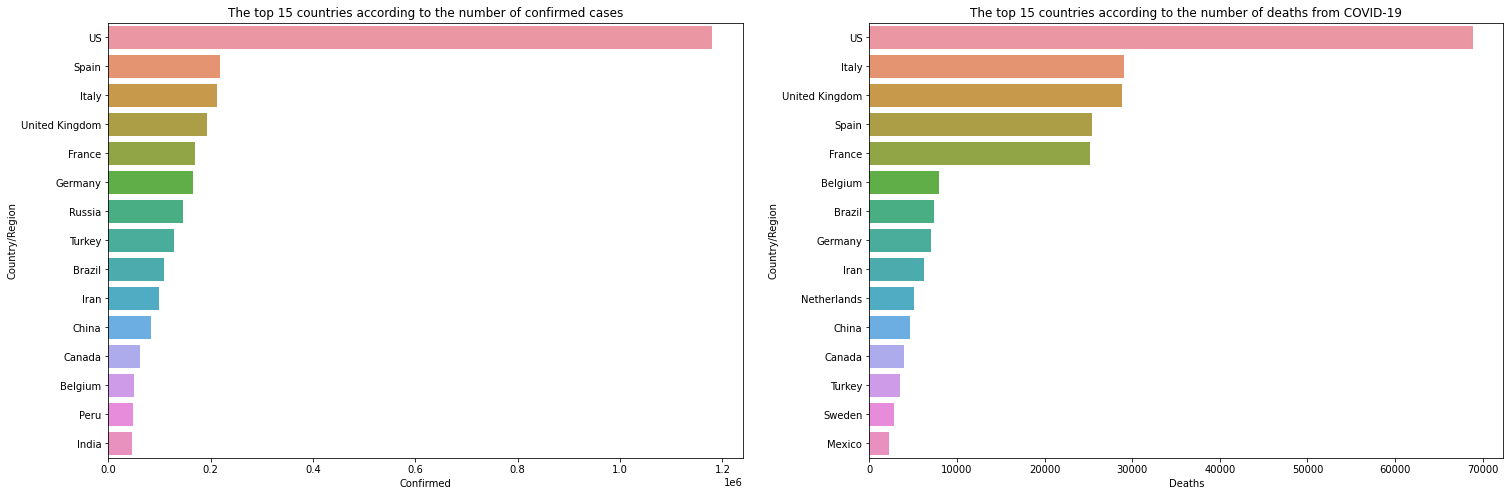

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,8))
top_15_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15_deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15_confirmed["Confirmed"],y=top_15_confirmed.index,ax=ax1)
ax1.set_title("The top 15 countries according to the number of confirmed cases")
sns.barplot(x=top_15_deaths["Deaths"],y=top_15_deaths.index,ax=ax2)
ax2.set_title("The top 15 countries according to the number of deaths from COVID-19")
plt.savefig('006br.png')

Top 25 Countries as per Mortatlity Rate and Recovery Rate with more than 500 Confirmed Cases

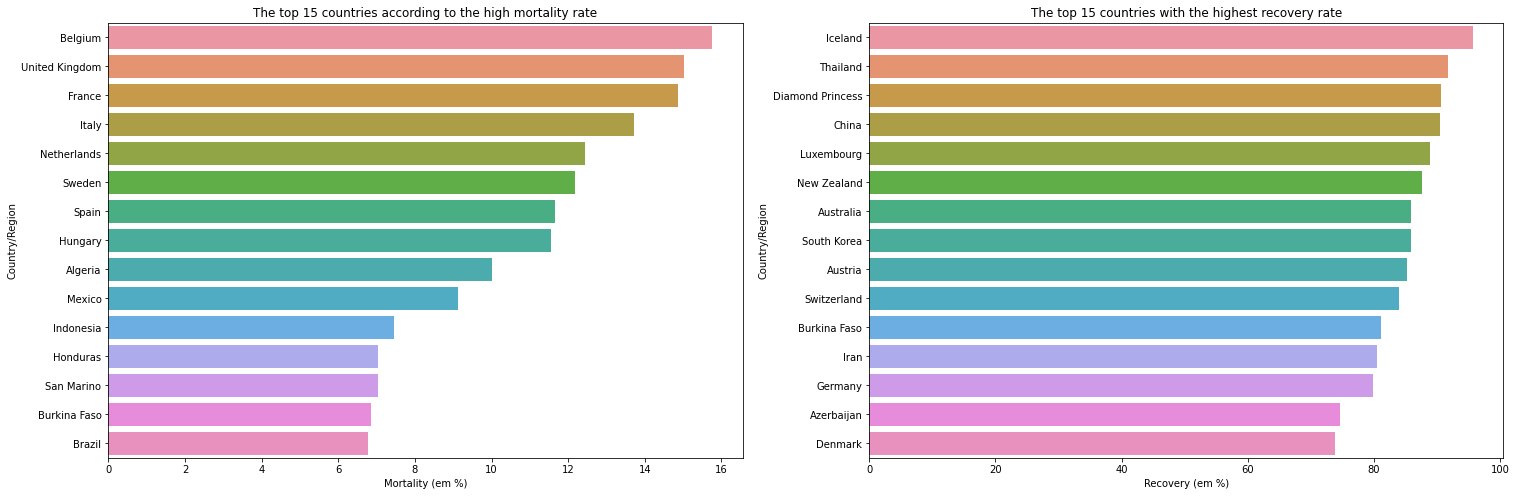

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,8))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("The top 15 countries according to the high mortality rate")
ax1.set_xlabel("Mortality (em %)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("The top 15 countries with the highest recovery rate")
ax2.set_xlabel("Recovery (em %)")
plt.savefig('007br.png')

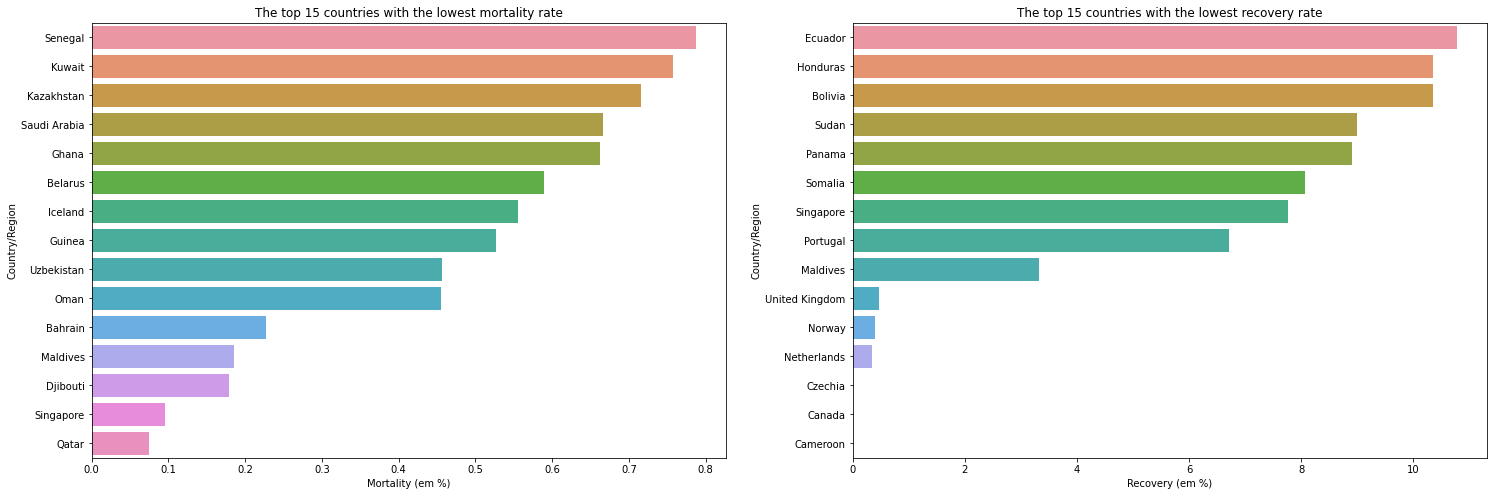

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,8))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("The top 15 countries with the lowest mortality rate")
ax1.set_xlabel("Mortality (em %)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("The top 15 countries with the lowest recovery rate")
ax2.set_xlabel("Recovery (em %)")

plt.savefig('008br.png')

Countries with more than 50 Confirmed and Cases with No Recovered Patients with considerable Mortality Rate

In [0]:
no_recovered_countries=countrywise[(countrywise["Confirmed"]>50)&(countrywise["Recovered"]==0)][["Confirmed","Deaths"]]
no_recovered_countries["Mortality Rate"]=(no_recovered_countries["Deaths"]/no_recovered_countries["Confirmed"])*100
no_recovered_countries[no_recovered_countries["Mortality Rate"]>0].sort_values(["Mortality Rate"],ascending=False)

,Confirmed,Deaths,Mortality Rate
Country/Region,,,
Canada,61957,4003,6.460933
Czechia,7819,252,3.222919
Cameroon,2104,64,3.041825
Tajikistan,230,3,1.304348


Serbia is the country we need to look after as the number of Positive cases are well above 1000 with considerable number of death cases with sign of Recovered Patients.
Countries with more than 100 Confirmed Cases and No Deaths with considerably high Recovery Rate


In [0]:
no_deaths=countrywise[(countrywise["Confirmed"]>100)&(countrywise["Deaths"]==0)]
no_deaths[no_deaths["Recovery"]>0].sort_values(["Recovery"],ascending=False).drop(["Mortality"],1)

,Confirmed,Recovered,Deaths,Recovery
Country/Region,,,,
Cambodia,122,120,0,98.360656
Vietnam,271,219,0,80.811808
Madagascar,149,99,0,66.442953
Rwanda,261,128,0,49.042146


Cambodia has able to contain COVID-19 pretty well with no Deaths recorded so far with pretty healthy Recovery Rate.

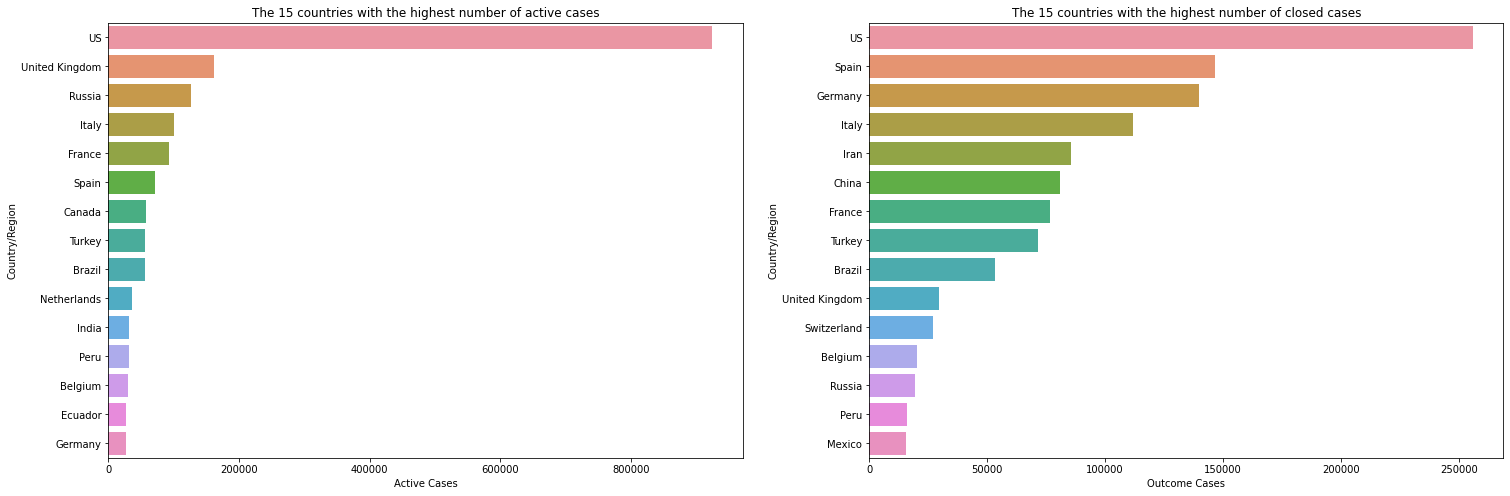

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,8))
countrywise["Active Cases"]=(countrywise["Confirmed"]-countrywise["Recovered"]-countrywise["Deaths"])
countrywise["Outcome Cases"]=(countrywise["Recovered"]+countrywise["Deaths"])
top_15_active=countrywise.sort_values(["Active Cases"],ascending=False).head(15)
top_15_outcome=countrywise.sort_values(["Outcome Cases"],ascending=False).head(15)
sns.barplot(x=top_15_active["Active Cases"],y=top_15_active.index,ax=ax1)
sns.barplot(x=top_15_outcome["Outcome Cases"],y=top_15_outcome.index,ax=ax2)
ax1.set_title("The 15 countries with the highest number of active cases")
ax2.set_title("The 15 countries with the highest number of closed cases")
plt.savefig('009br.png')

In [0]:
country_date=df.groupby(["Country/Region","Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
confirm_rate=[]
for country in countrywise.index:
    days=country_date.loc[country].shape[0]
    confirm_rate.append((countrywise.loc[country]["Confirmed"])/days)
countrywise["Confirm Cases/Day"]=confirm_rate

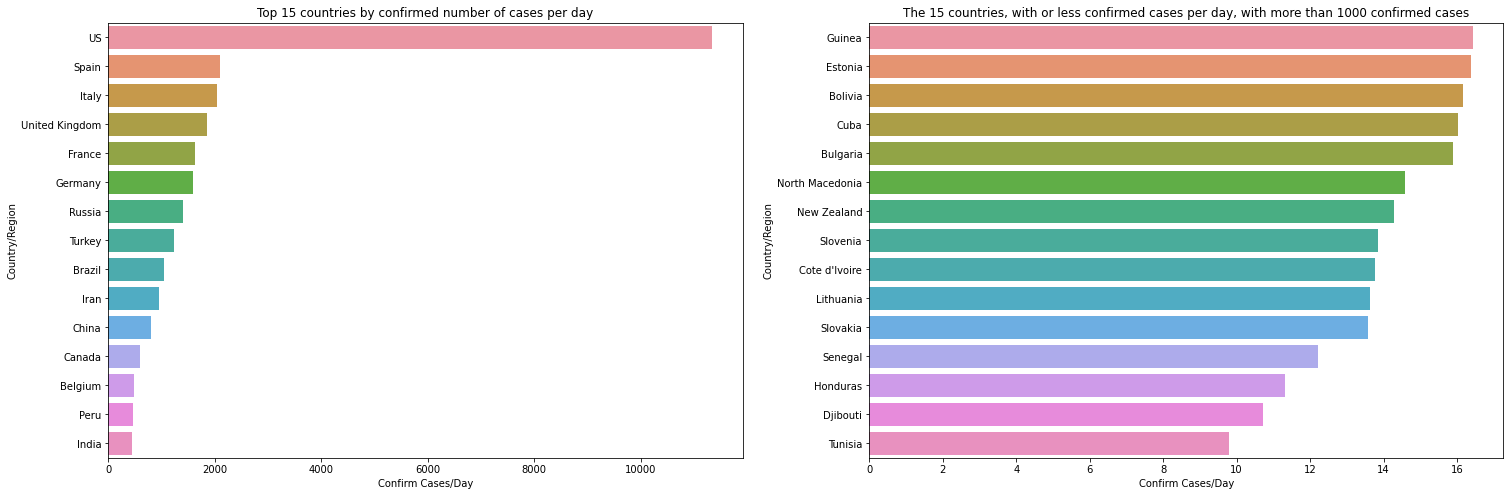

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,8))
top_15_ccpd=countrywise.sort_values(["Confirm Cases/Day"],ascending=False).head(15)
sns.barplot(y=top_15_ccpd.index,x=top_15_ccpd["Confirm Cases/Day"],ax=ax1)
ax1.set_title("Top 15 countries by confirmed number of cases per day")
bottom_15_ccpd=countrywise[countrywise["Confirmed"]>1000].sort_values(["Confirm Cases/Day"],ascending=False).tail(15)
sns.barplot(y=bottom_15_ccpd.index,x=bottom_15_ccpd["Confirm Cases/Day"],ax=ax2)
ax2.set_title("The 15 countries, with or less confirmed cases per day, with more than 1000 confirmed cases")
plt.savefig('010br.png')

Average probability of survival in all countries  : 95.88%
Median probability of survival in all countries: 96.99%
Average probability of death in all countries          :  4.12%
median probability of death in all countries        :  3.01%


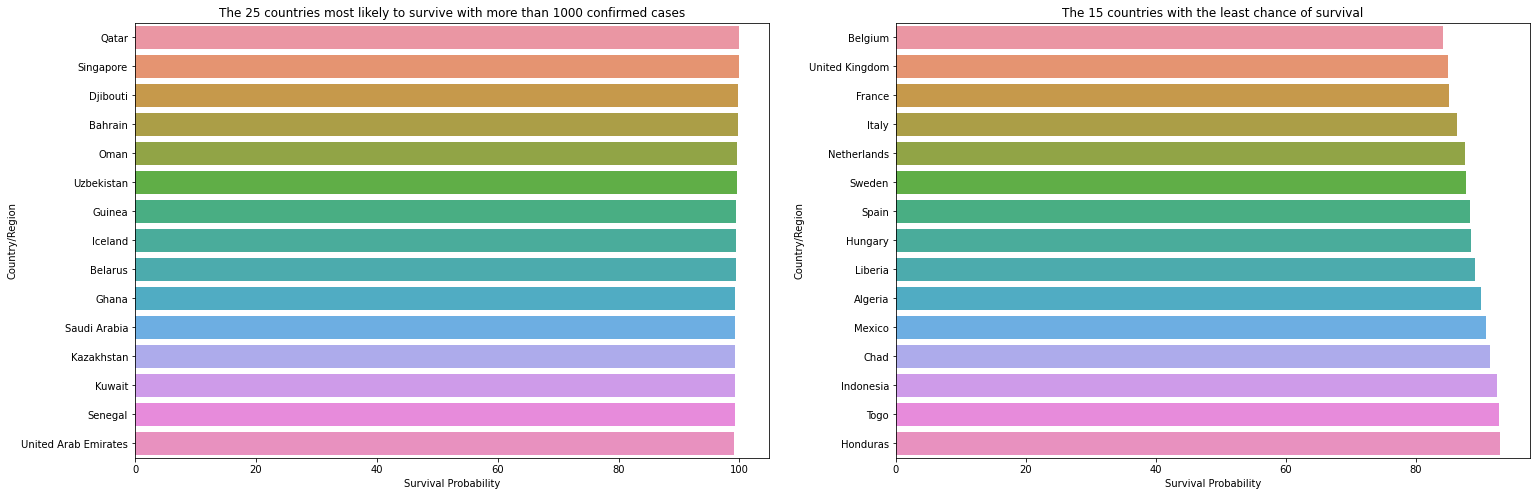

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,8))
countrywise["Survival Probability"]=(1-(countrywise["Deaths"]/countrywise["Confirmed"]))*100
top_25_survival=countrywise[countrywise["Confirmed"]>1000].sort_values(["Survival Probability"],ascending=False).head(15)
sns.barplot(x=top_25_survival["Survival Probability"],y=top_25_survival.index,ax=ax1)
ax1.set_title("The 25 countries most likely to survive with more than 1000 confirmed cases")

precision = 2
 

print( "Average probability of survival in all countries  : {:.{}f}%".format( countrywise["Survival Probability"].mean(), precision ))
print( "Median probability of survival in all countries: {:.{}f}%".format( countrywise["Survival Probability"].median(), precision ))
print( "Average probability of death in all countries          :  {:.{}f}%".format( 100-countrywise["Survival Probability"].mean(), precision ))
print( "median probability of death in all countries        :  {:.{}f}%".format( 100-countrywise["Survival Probability"].median(), precision ))


Bottom_5_countries=countrywise[countrywise["Confirmed"]>100].sort_values(["Survival Probability"],ascending=True).head(15)
sns.barplot(x=Bottom_5_countries["Survival Probability"],y=Bottom_5_countries.index,ax=ax2)
plt.title("The 15 countries with the least chance of survival")

plt.savefig('011br.png')

Survival Probability is the only graph that looks the most promising! Having average survival probability of 97%+ across all countries but it's dropping by slight margin everyday. The difference between Mean and Death Probability is an clear indication that there few countries with really high mortality rate e.g. Italy, Algeria, UK etc.


#Comparison of China, Italy, US, Spain and Rest of the World

In [0]:
covid=df

In [0]:
china_data=covid[covid["Country/Region"]=="Mainland China"]
Italy_data=covid[covid["Country/Region"]=="Italy"]
US_data=covid[covid["Country/Region"]=="US"]
spain_data=covid[covid["Country/Region"]=="Spain"]
rest_of_world=covid[(covid["Country/Region"]!="Mainland China")&(covid["Country/Region"]!="Italy")&(covid["Country/Region"]!="US")&(covid["Country/Region"]!="Spain")]

datewise_china=china_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Italy=Italy_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_US=US_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Spain=spain_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_restofworld=rest_of_world.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

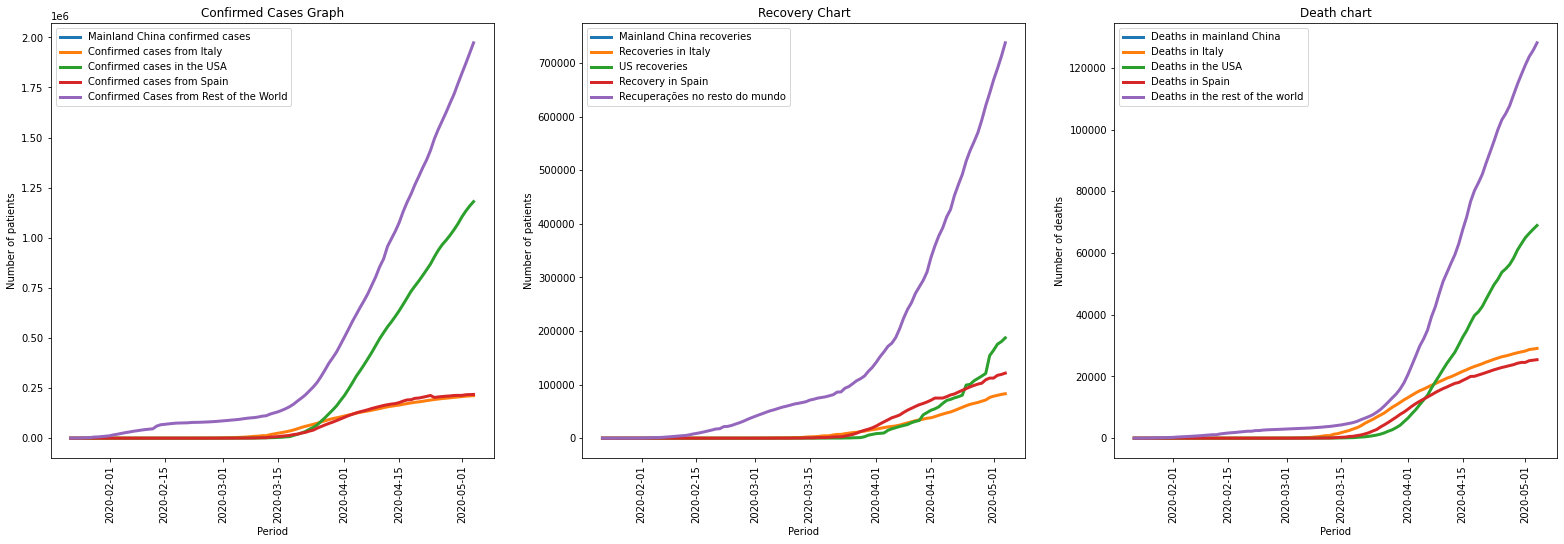

In [0]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(27,8))
ax1.plot(datewise_china["Confirmed"],label="Mainland China confirmed cases",linewidth=3)
ax1.plot(datewise_Italy["Confirmed"],label="Confirmed cases from Italy",linewidth=3)
ax1.plot(datewise_US["Confirmed"],label="Confirmed cases in the USA",linewidth=3)
ax1.plot(datewise_Spain["Confirmed"],label="Confirmed cases from Spain",linewidth=3)
ax1.plot(datewise_restofworld["Confirmed"],label="Confirmed Cases from Rest of the World",linewidth=3)
ax1.set_title("Confirmed Cases Graph")
ax1.set_ylabel("Number of patients")
ax1.set_xlabel("Period")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise_china["Recovered"],label="Mainland China recoveries",linewidth=3)
ax2.plot(datewise_Italy["Recovered"],label="Recoveries in Italy",linewidth=3)
ax2.plot(datewise_US["Recovered"],label="US recoveries",linewidth=3)
ax2.plot(datewise_Spain["Recovered"],label="Recovery in Spain",linewidth=3)
ax2.plot(datewise_restofworld["Recovered"],label="Recuperações no resto do mundo",linewidth=3)
ax2.set_title("Recovery Chart")
ax2.set_ylabel("Number of patients")
ax2.set_xlabel("Period")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
ax3.plot(datewise_china["Deaths"],label='Deaths in mainland China',linewidth=3)
ax3.plot(datewise_Italy["Deaths"],label='Deaths in Italy',linewidth=3)
ax3.plot(datewise_US["Deaths"],label='Deaths in the USA',linewidth=3)
ax3.plot(datewise_Spain["Deaths"],label='Deaths in Spain',linewidth=3)
ax3.plot(datewise_restofworld["Deaths"],label="Deaths in the rest of the world",linewidth=3)
ax3.set_title("Death chart")
ax3.set_ylabel("Number of deaths")
ax3.set_xlabel("Period")
ax3.legend()
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)
    
plt.savefig('012br.png')


China has been able to "flatten the curve" looking at their graphs of Confirmed and Death Cases. With staggering Recovery Rate.
US seems to have good control on Deaths, but number of people getting affected is going way out of hand

In [0]:
datewise_china["Mortality"]=(datewise_china["Deaths"]/datewise_china["Confirmed"])*100
datewise_Italy["Mortality"]=(datewise_Italy["Deaths"]/datewise_Italy["Confirmed"])*100
datewise_US["Mortality"]=(datewise_US["Deaths"]/datewise_US["Confirmed"])*100
datewise_Spain["Mortality"]=(datewise_Spain["Deaths"]/datewise_Spain["Confirmed"])*100
datewise_restofworld["Mortality"]=(datewise_restofworld["Deaths"]/datewise_restofworld["Confirmed"])*100

datewise_china["Recovery"]=(datewise_china["Recovered"]/datewise_china["Confirmed"])*100
datewise_Italy["Recovery"]=(datewise_Italy["Recovered"]/datewise_Italy["Confirmed"])*100
datewise_US["Recovery"]=(datewise_US["Recovered"]/datewise_US["Confirmed"])*100
datewise_Spain["Recovery"]=(datewise_Spain["Recovered"]/datewise_Spain["Confirmed"])*100
datewise_restofworld["Recovery"]=(datewise_restofworld["Recovered"]/datewise_restofworld["Confirmed"])*100

Taking off Recovery Rate of Spain is a good sign but it's nowhere in comparison to the Moratality Rate. Its alarming sign for USA as Recovery Rate is dropping down with Mortality Rate taking off
We can clearly notice the decreasing trend in the number of Daily Confirmed and Death Cases of Spain and Italy. That's really positive sign for both th countries.

## Data Analysis for UK

In [0]:
country = "United Kingdom"
poland_data=covid[covid["Country/Region"]==country]
datewise_poland=poland_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
print(datewise_poland.iloc[-1])
print()
print("Total active cases    : ",datewise_poland["Confirmed"].iloc[-1]-datewise_poland["Recovered"].iloc[-1]-datewise_poland["Deaths"].iloc[-1])
print("Total Cases Completed: ",datewise_poland["Recovered"].iloc[-1]+datewise_poland["Deaths"].iloc[-1])

Confirmed    191832
Recovered       910
Deaths        28809
Name: 2020-05-04 00:00:00, dtype: int64

Total active cases    :  162113
Total Cases Completed:  29719


In [0]:
print("****************************************************************************")
print("Basic information about COVID-19 in Brazil until the day " + str(today) +".")
print("****************************************************************************")
print(" ")

print("****************************************************************************")
print("Total number of confirmed cases in Brazil                   :  {:.0f} ".format(datewise_poland["Confirmed"].iloc[-1]))
print("Total number of recoveries in Brazil                        :  {:.0f}".format(datewise_poland["Recovered"].iloc[-1]))
print("Total number of COVID-19 deaths in Brazil                :   {:.0f}".format(datewise_poland["Deaths"].iloc[-1]))
print("Total number of active cases in Brazil                        : ",int((datewise_poland["Confirmed"].iloc[-1]-datewise_poland["Recovered"].iloc[-1]-datewise_poland["Deaths"].iloc[-1])))
print("Total number of cases closed in Brazil                    : ",int(datewise_poland["Recovered"].iloc[-1]+datewise_poland["Deaths"].iloc[-1]))
print("****************************************************************************")

print(" ")
print("****************************************************************************")
print("Approximate number of confirmed cases per day in Brazil      :  ",int(np.round(datewise_poland["Confirmed"].iloc[-1]/datewise_poland.shape[0])))
print("Approximate number of recoveries per day in Brazil           :   ",int(np.round(datewise_poland["Recovered"].iloc[-1]/datewise_poland.shape[0])))
print("Approximate number of COVID-19 deaths per day in Brazil    :    ",int(np.round(datewise_poland["Deaths"].iloc[-1]/datewise_poland.shape[0])))
print("Approximate number of confirmed cases per hour in Brazil    :    ",int(np.round(datewise_poland["Confirmed"].iloc[-1]/((datewise_poland.shape[0])*24))))
print("Approximate number of recoveries per hour in Brazil          :    ",int(np.round(datewise_poland["Recovered"].iloc[-1]/((datewise_poland.shape[0])*24))))
print("Approximate number of COVID-19 deaths per hour in Brazil   :     ",int(np.round(datewise_poland["Deaths"].iloc[-1]/((datewise_poland.shape[0])*24))))
print("****************************************************************************")
print(" ")
print("****************************************************************************")
print("Acknowledgments:")
print("We are grateful to WHO and Johns Hopkins University for the data available to")
print("educational and academic research purposes - Jair Ribeiro")
print("****************************************************************************")

****************************************************************************
Basic information about COVID-19 in Brazil until the day 05-05-2020.
****************************************************************************
 
****************************************************************************
Total number of confirmed cases in Brazil                   :  191832 
Total number of recoveries in Brazil                        :  910
Total number of COVID-19 deaths in Brazil                :   28809
Total number of active cases in Brazil                        :  162113
Total number of cases closed in Brazil                    :  29719
****************************************************************************
 
****************************************************************************
Approximate number of confirmed cases per day in Brazil      :   1845
Approximate number of recoveries per day in Brazil           :    9
Approximate number of COVID-19 deaths per day in Brazil    :

**Comparing Average mortality and recovery rate in Poland and Worldwide

Comparing average mortality and recovery rates worldwide and locally. (between brackets the averages inUnited Kingdom).

Average Mortality Rate  :  4.37 ( 6.45)
Average Recovery Rate  : 24.68 (12.91)


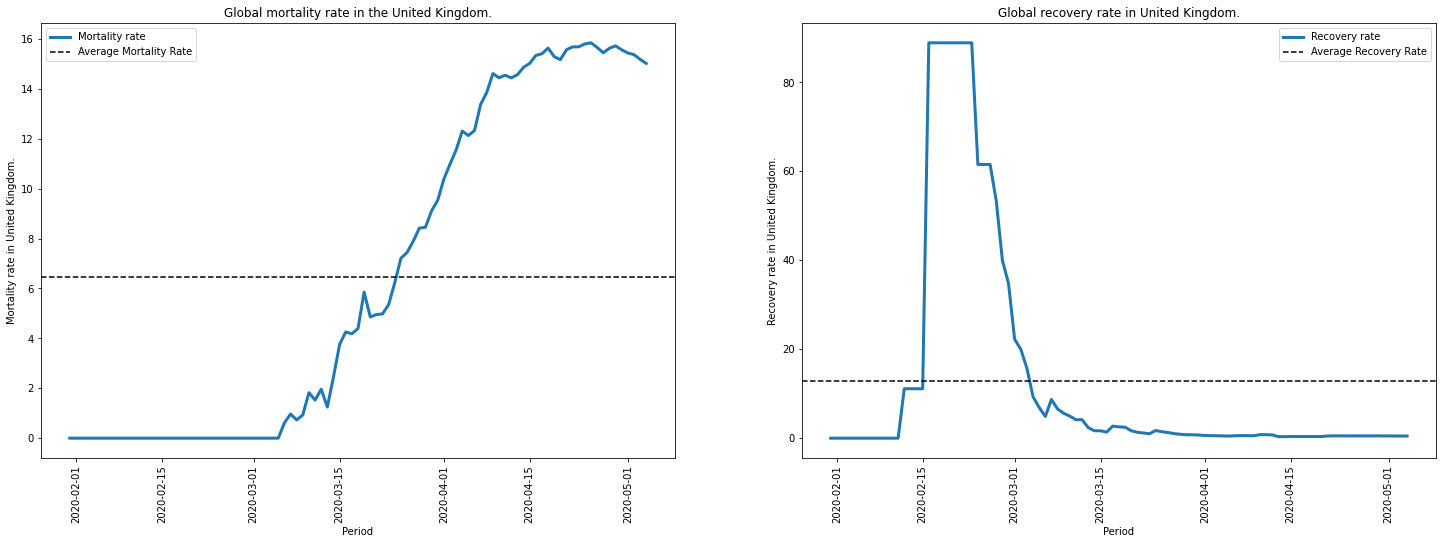

In [0]:
#Calculating the Mortality Rate and Recovery Rate Worldwide
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

#Calculating the Mortality Rate and Recovery Rate local
datewise_poland["Mortality Rate"]=(datewise_poland["Deaths"]/datewise_poland["Confirmed"])*100
datewise_poland["Recovery Rate"]=(datewise_poland["Recovered"]/datewise_poland["Confirmed"])*100
datewise_poland["Active Cases"]=datewise_poland["Confirmed"]-datewise_poland["Recovered"]-datewise_poland["Deaths"]
datewise_poland["Closed Cases"]=datewise_poland["Recovered"]+datewise_poland["Deaths"]

#Plotting Mortality and Recovery Rate 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,8))
ax1.plot(datewise_poland["Mortality Rate"],label='Mortality rate',linewidth=3)
ax1.axhline(datewise_poland["Mortality Rate"].mean(),linestyle='--',color='black',label="Average Mortality Rate")
ax1.set_ylabel("Mortality rate in " + country +".")
ax1.set_xlabel("Period")
ax1.set_title("Global mortality rate in the " + country +".")
ax1.legend()

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise_poland["Recovery Rate"],label="Recovery rate",linewidth=3)
ax2.axhline(datewise_poland["Recovery Rate"].mean(),linestyle='--',color='black',label="Average Recovery Rate")
ax2.set_ylabel("Recovery rate in " + country +".")
ax2.set_xlabel("Period")
ax2.set_title("Global recovery rate in " + country +".")
ax2.legend()

for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
    

precision = 2
#print( "{:.{}f}".format( pi, precision )) 

print("Comparing average mortality and recovery rates worldwide and locally. (between brackets the averages in" + country +").")
print()

print( "Average Mortality Rate  :  {:.{}f}".format( datewise["Mortality Rate"].mean(), precision ) +" ( {:.{}f}".format( datewise_poland["Mortality Rate"].mean(), precision )+")") 
#print( "Taxa Média de Mortalidade   :  {:.{}f}".format( datewise["Mortality Rate"].median(), precision ) + " ( {:.{}f}".format( datewise_poland["Mortality Rate"].median(), precision )+")")
print( "Average Recovery Rate  : {:.{}f}".format( datewise["Recovery Rate"].mean(), precision ) + " ({:.{}f}".format( datewise_poland["Recovery Rate"].mean(), precision )+")")
#print( "Taxa de Recuperação Mediana :  {:.{}f}".format( datewise["Recovery Rate"].median(), precision ) + " ( {:.{}f}".format( datewise_poland["Recovery Rate"].median(), precision )+")")

plt.savefig('013br.png')

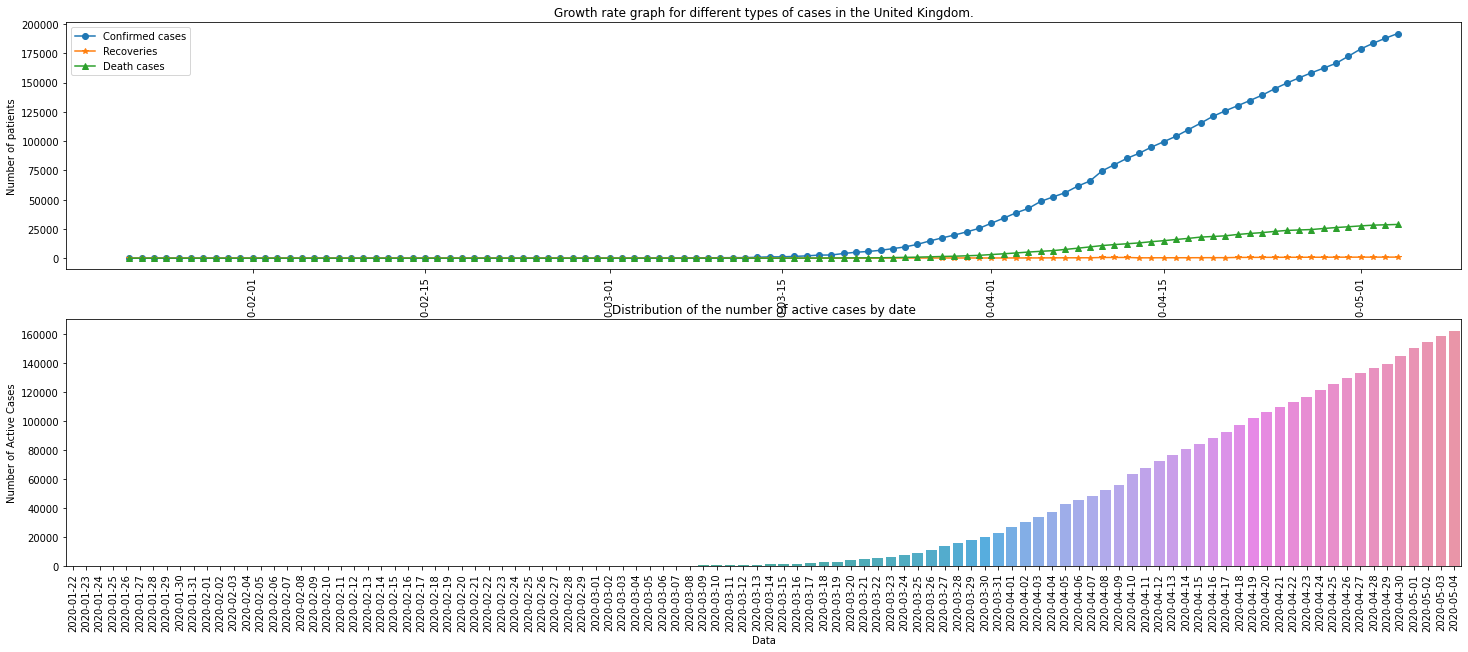

In [0]:
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(25,10))
ax1.plot(datewise_poland["Confirmed"],marker='o',label="Confirmed cases")
ax1.plot(datewise_poland["Recovered"],marker='*',label="Recoveries")
ax1.plot(datewise_poland["Deaths"],marker='^',label="Death cases")
ax1.set_ylabel("Number of patients")
ax1.set_xlabel("Data")
ax1.legend()
ax1.set_title("Growth rate graph for different types of cases in the " + country +".")
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
sns.barplot(datewise_poland.index.date,datewise_poland["Confirmed"]-datewise_poland["Recovered"]-datewise_poland["Deaths"],ax=ax2)
ax2.set_xlabel("Data")
ax2.set_ylabel("Number of Active Cases")
ax2.set_title("Distribution of the number of active cases by date")
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
    
plt.savefig('014br.png')


In [0]:
poland_increase_confirm=[]
poland_increase_recover=[]
poland_increase_deaths=[]
for i in range(datewise_poland.shape[0]-1):
    poland_increase_confirm.append(((datewise_poland["Confirmed"].iloc[i+1])/datewise_poland["Confirmed"].iloc[i]))
    poland_increase_recover.append(((datewise_poland["Recovered"].iloc[i+1])/datewise_poland["Recovered"].iloc[i]))
    poland_increase_deaths.append(((datewise_poland["Deaths"].iloc[i+1])/datewise_poland["Deaths"].iloc[i]))
poland_increase_confirm.insert(0,1)
poland_increase_recover.insert(0,1)
poland_increase_deaths.insert(0,1)


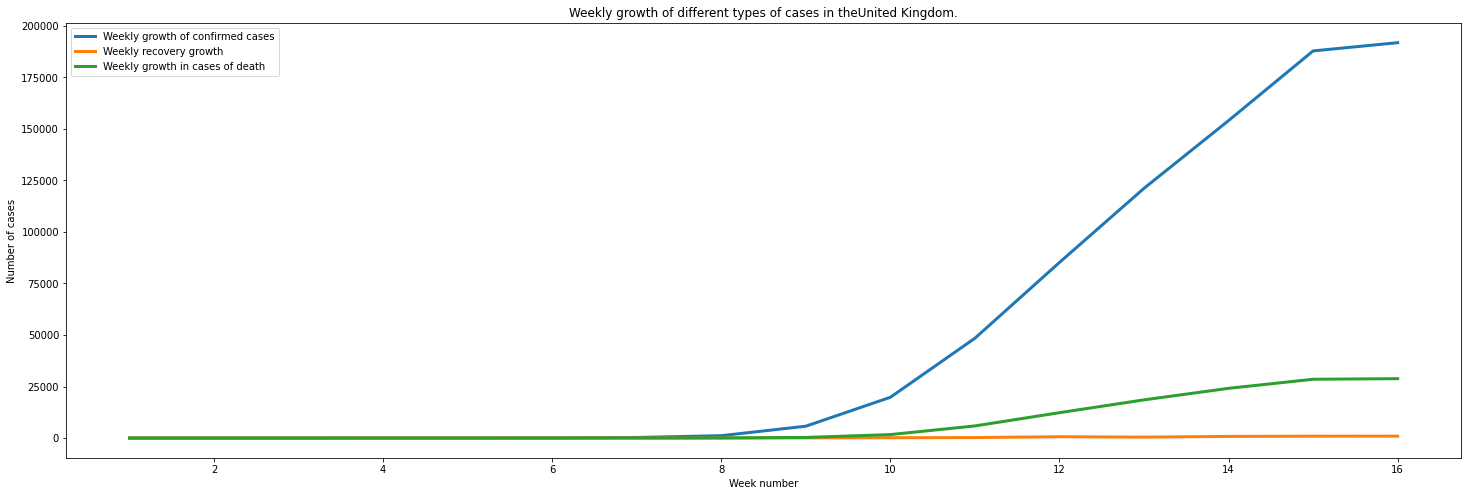

In [0]:
datewise_poland["WeekOfYear"]=datewise_poland.index.weekofyear

week_num_poland=[]
poland_weekwise_confirmed=[]
poland_weekwise_recovered=[]
poland_weekwise_deaths=[]
w=1
for i in list(datewise_poland["WeekOfYear"].unique()):
    poland_weekwise_confirmed.append(datewise_poland[datewise_poland["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    poland_weekwise_recovered.append(datewise_poland[datewise_poland["WeekOfYear"]==i]["Recovered"].iloc[-1])
    poland_weekwise_deaths.append(datewise_poland[datewise_poland["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num_poland.append(w)
    w=w+1
    
plt.figure(figsize=(25,8))
plt.plot(week_num_poland,poland_weekwise_confirmed,linewidth=3,label="Weekly growth of confirmed cases")
plt.plot(week_num_poland,poland_weekwise_recovered,linewidth=3,label="Weekly recovery growth")
plt.plot(week_num_poland,poland_weekwise_deaths,linewidth=3,label="Weekly growth in cases of death")
plt.xlabel('Week number')
plt.ylabel("Number of cases")
plt.title("Weekly growth of different types of cases in the" + country +".")
plt.legend()
plt.savefig('015br.png')


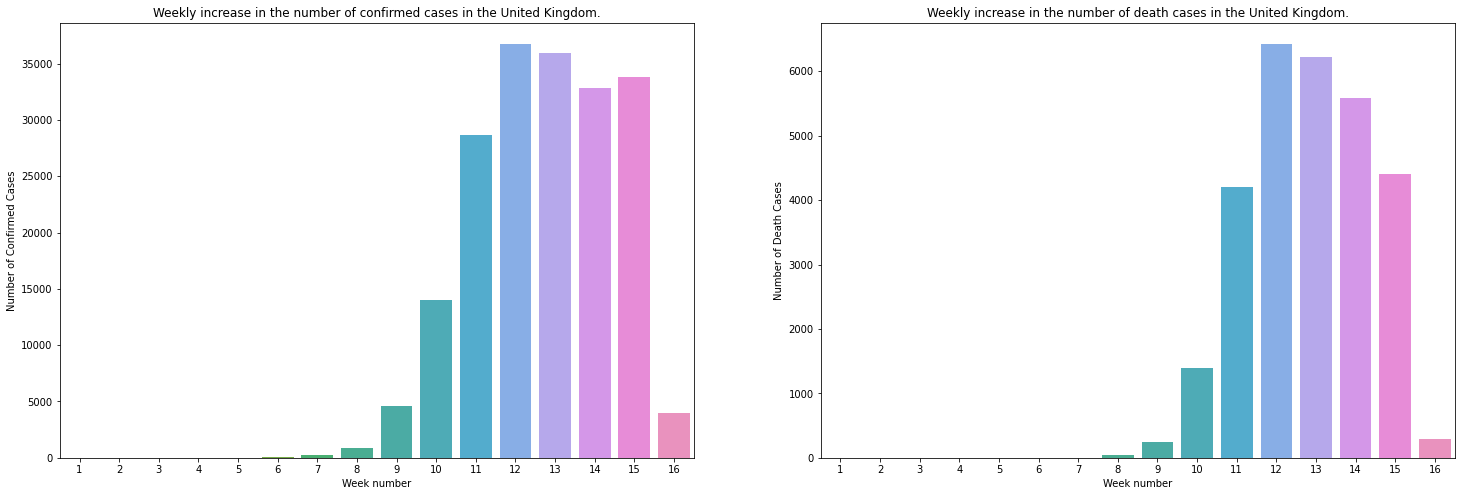

In [0]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(25,8))
sns.barplot(x=week_num_poland,y=pd.Series(poland_weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num_poland,y=pd.Series(poland_weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week number")
ax2.set_xlabel("Week number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Weekly increase in the number of confirmed cases in the " + country +".")
ax2.set_title("Weekly increase in the number of death cases in the " + country +".")
plt.savefig('016br.png')


In [0]:
max_ind=datewise_poland["Confirmed"].max()
#plt.figure(figsize=(25,8))
#plt.plot(datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)]["Confirmed"],label="Confirmed Cases Italy",linewidth=3)
#plt.plot(datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)]["Confirmed"],label="Confirmed Cases USA",linewidth=3)
#plt.plot(datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)]["Confirmed"],label="Confirmed Cases Spain",linewidth=3)
#plt.plot(datewise_poland[datewise_poland["Confirmed"]>0]["Confirmed"],label="Confirmed Cases in " + country +".",linewidth=3)
#plt.xlabel("Date")
#plt.ylabel("Number of Confirmed Cases")
#plt.title("Growth of Confirmed Cases in " + country +".")
#plt.legend()
#plt.xticks(rotation=90)

#print("It took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach number of Confirmed Cases equivalent to " + country +"")
#print("It took",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in USA to reach number of Confirmed Cases equivalent to " + country +"")
#print("It took",datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)].shape[0],"days in Spain to reach number of Confirmed Cases equivalent to " + country +"")
#print("It took",datewise_poland[datewise_poland["Confirmed"]>0].shape[0],"days in " + country +" to reach",max_ind,"Confirmed Cases")

Comparison of Daily Increase in Number of Cases of Italy, Spain, USA and Poland, where maximum number of Confirmed Cases are equivalent to maximum number of Confirmed Cases in Poland

#Prediction using Machine Learning Models

Linear Regression Model for Confirm Cases Prediction

In [0]:
poland_data=covid[covid["Country/Region"]=="United Kingdom"]
datewise_poland=poland_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
print(datewise_poland.iloc[-1])
print("Total Active Cases: ",datewise_poland["Confirmed"].iloc[-1]-datewise_poland["Recovered"].iloc[-1]-datewise_poland["Deaths"].iloc[-1])
print("Total Closed Cases: ",datewise_poland["Recovered"].iloc[-1]+datewise_poland["Deaths"].iloc[-1])

Confirmed    191832
Recovered       910
Deaths        28809
Name: 2020-05-04 00:00:00, dtype: int64
Total Active Cases:  162113
Total Closed Cases:  29719


In [0]:
datewise = datewise_poland
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [0]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.90)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.90):]
model_scores=[]

In [0]:
lin_reg=LinearRegression(normalize=True)

In [0]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [0]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  87506.10773256823


In [0]:
country

'United Kingdom'

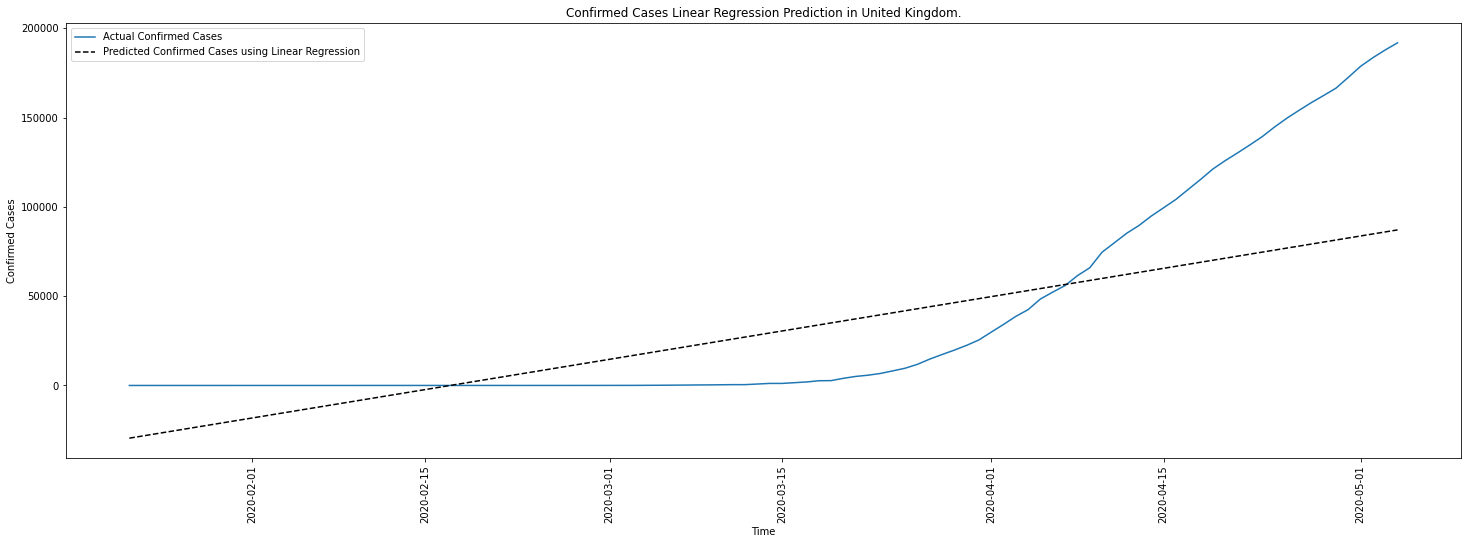

In [0]:
plt.figure(figsize=(25,8))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Actual Confirmed Cases")
plt.plot(datewise.index,prediction_linreg, linestyle='--',label="Predicted Confirmed Cases using Linear Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Linear Regression Prediction in " + country +".")
plt.xticks(rotation=90)
plt.legend()

The Linear Regression Model seems to be really falling aprat. As it is clearly visible that the trend of Confirmed Cases in not at all Linear¶

#Support Vector Machine Model Regressor for Prediction of Confirmed Cases¶

In [0]:
#Intializing SVR Model and with hyperparameters for GridSearchCV
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.01)

In [0]:
#Performing GridSearchCV to find the Best Estimator
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

SVR(C=1, cache_size=200, coef0=0.0, degree=6, epsilon=0.01, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [0]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))

precision = 2
#print( "{:.{}f}".format( pi, precision )) 

print( "Root Mean Square Error for Support Vectore Machine: {:.{}f}".format( np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)), precision ))

Root Mean Square Error for Support Vectore Machine: 77717.86


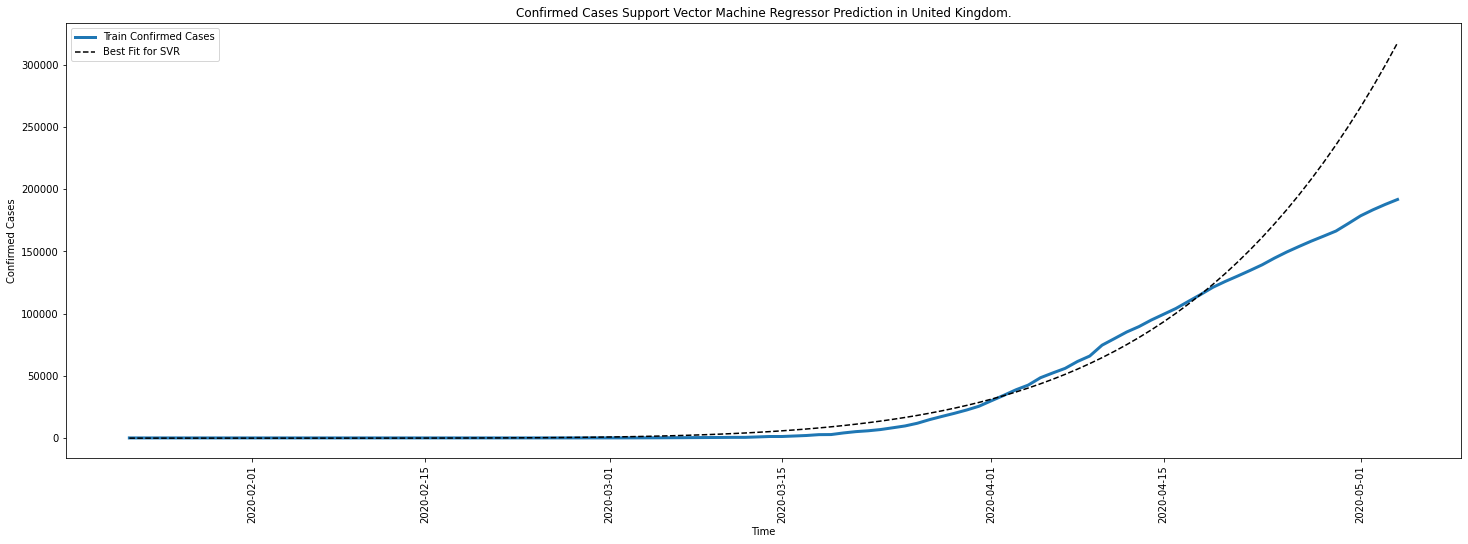

In [0]:
plt.figure(figsize=(25,8))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Train Confirmed Cases",linewidth=3)
plt.plot(datewise.index,prediction_svm, linestyle='--',label="Best Fit for SVR",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Support Vector Machine Regressor Prediction in " + country +".")
plt.xticks(rotation=90)
plt.legend()

In [0]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])

In [0]:
pd.set_option('precision', 0)
pd.options.display.float_format = '{:,.0f}'.format
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns=["Dates","Linear Regression Prediction","SVM Prediction"])
#model_predictions.head()

In [0]:
df = pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns=["Dates","Linear Regression Prediction","SVM Prediction"])

df['Dates'] = pd.to_datetime(df['Dates'])
pd.options.display.float_format = '{:,.0f}'.format
pd.set_option('precision', 0)

#df = df[(df['yhat']>0)]
df.rename(columns={'Linear Regression Prediction': 'LRP', 'SVM Prediction': 'SVM'}, inplace=True)
#df

Predictions of Linear Regression are nowhere close to actual numbers

#Time Series Forecasting

Holt's Linear Model

In [0]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.90)]
valid=datewise.iloc[int(datewise.shape[0]*0.90):]

In [0]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.3, smoothing_slope=0.9)
y_pred=valid.copy()

In [0]:
y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))

precision = 2
#print( "{:.{}f}".format( pi, precision )) 

print( "Root Mean Square Error Holt's Linear Model: {:.{}f}".format( np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])), precision ))

Root Mean Square Error Holt's Linear Model: 2489.98


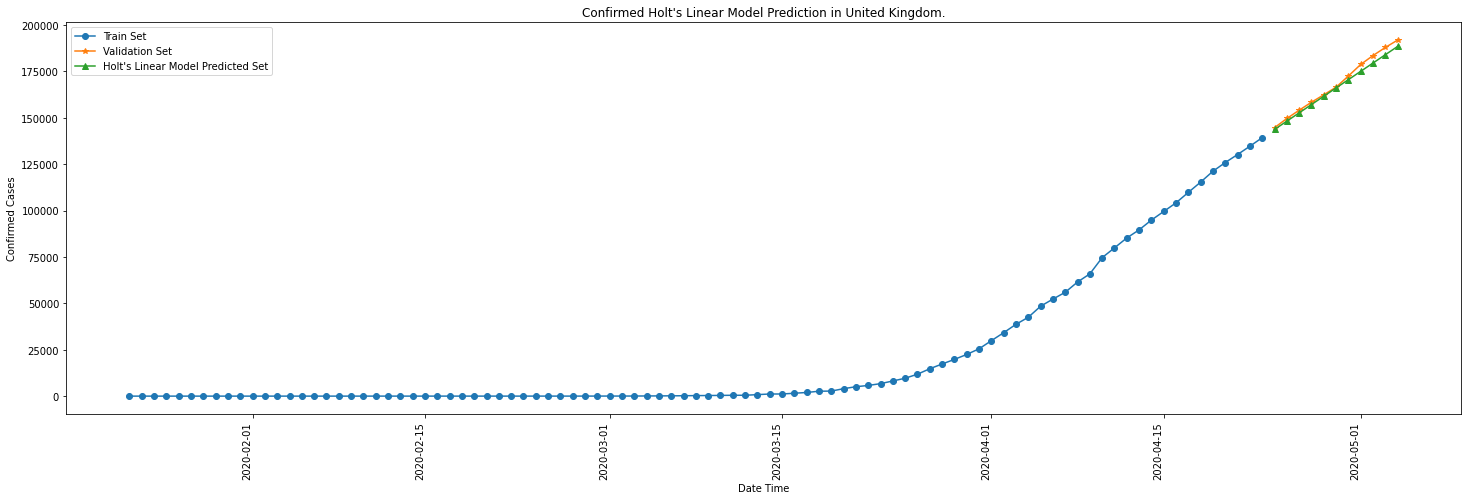

In [0]:
plt.figure(figsize=(25,8))
plt.plot(model_train.Confirmed,label="Train Set",marker='o')
valid.Confirmed.plot(label="Validation Set",marker='*')
y_pred.Holt.plot(label="Holt's Linear Model Predicted Set",marker='^')
plt.ylabel("Confirmed Cases")
plt.xlabel("Date Time")
plt.title("Confirmed Holt's Linear Model Prediction in " + country +".")
plt.xticks(rotation=90)
plt.legend()

In [0]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
    holt_new_date.append(datewise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holts Linear Model Prediction"]=holt_new_prediction
#model_predictions.head()

In [0]:
df = pd.DataFrame(model_predictions,columns=["Dates","Linear Regression Prediction","SVM Prediction","Holts Linear Model Prediction"])

df['Dates'] = pd.to_datetime(df['Dates'])
pd.options.display.float_format = '{:,.0f}'.format
pd.set_option('precision', 0)

#df = df[(df['yhat']>0)]
df.rename(columns={'Linear Regression Prediction': 'LRP', 'SVM Prediction': 'SVM','Holts Linear Model Prediction': 'Holts'}, inplace=True)
#df

Holt's Winter Model for Daily Time Series

In [0]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.90)]
valid=datewise.iloc[int(datewise.shape[0]*0.90):]
y_pred=valid.copy()

In [0]:
es=ExponentialSmoothing(np.asarray(model_train['Confirmed']),seasonal_periods=5,trend='add', seasonal='add').fit()

In [0]:
y_pred["Holt's Winter Model"]=es.forecast(len(valid))

In [0]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))

precision = 2
#print( "{:.{}f}".format( pi, precision )) 

print( "Root Mean Square Error for Holt's Winter Model: {:.{}f}".format( np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])), precision ))

Root Mean Square Error for Holt's Winter Model: 1695.26


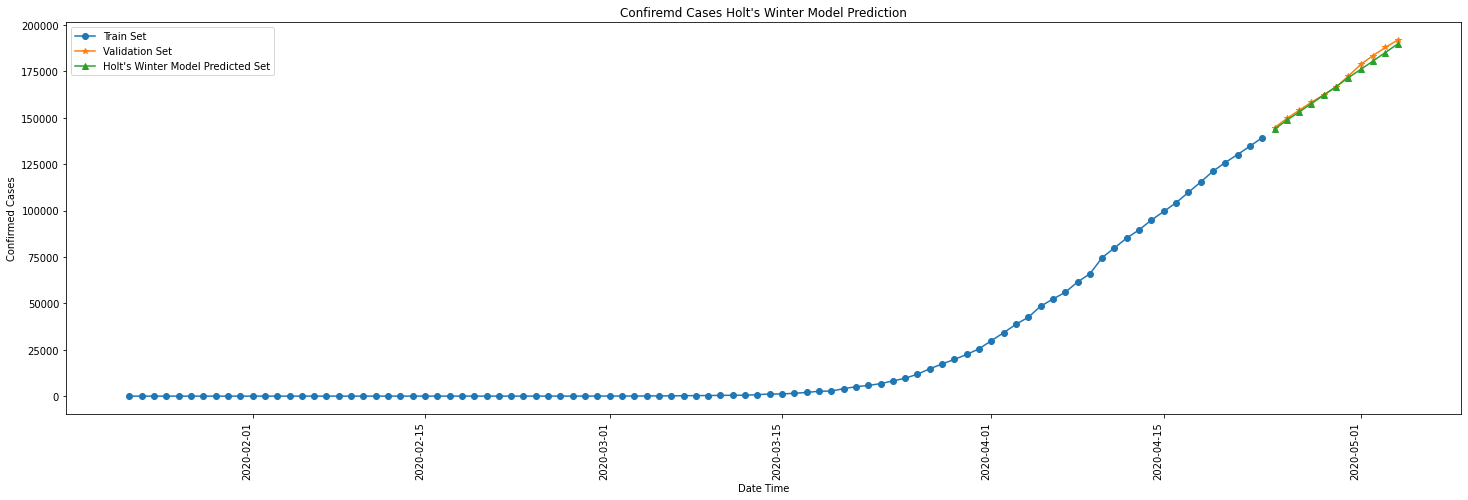

In [0]:
plt.figure(figsize=(25,8))
plt.plot(model_train.Confirmed,label="Train Set",marker='o')
valid.Confirmed.plot(label="Validation Set",marker='*')
y_pred["Holt\'s Winter Model"].plot(label="Holt's Winter Model Predicted Set",marker='^')
plt.ylabel("Confirmed Cases")
plt.xlabel("Date Time")
plt.title("Confiremd Cases Holt's Winter Model Prediction")
plt.xticks(rotation=90)
plt.legend()

In [0]:
holt_winter_new_prediction=[]
for i in range(1,18):
    holt_winter_new_prediction.append(es.forecast((len(valid)+i))[-1])
model_predictions["Holts Winter Model Prediction"]=holt_winter_new_prediction
model_predictions.head()
#model_predictions

,Dates,Linear Regression Prediction,SVM Prediction,Holts Linear Model Prediction,Holts Winter Model Prediction
0,2020-05-05,"88,219","336,841","192,885","194,548"
1,2020-05-06,"89,351","356,758","197,360","198,946"
2,2020-05-07,"90,483","377,646","201,834","203,501"
3,2020-05-08,"91,615","399,544","206,309","208,059"
4,2020-05-09,"92,747","422,489","210,783","212,643"


In [0]:
df = pd.DataFrame(model_predictions,columns=["Dates","Linear Regression Prediction","SVM Prediction"\
                                             ,"Holts Linear Model Prediction","Holts Winter Model Prediction"])

df['Dates'] = pd.to_datetime(df['Dates'])
pd.options.display.float_format = '{:,.0f}'.format
pd.set_option('precision', 0)

#df = df[(df['yhat']>0)]
df.rename(columns={'Linear Regression Prediction': 'LRP', 'SVM Prediction': 'SVM','Holts Linear Model Prediction': 'HLM'\
,'Holts Winter Model Prediction': 'HWM'}, inplace=True)
df

,Dates,LRP,SVM,HLM,HWM
0,2020-05-05,"88,219","336,841","192,885","194,548"
1,2020-05-06,"89,351","356,758","197,360","198,946"
2,2020-05-07,"90,483","377,646","201,834","203,501"
3,2020-05-08,"91,615","399,544","206,309","208,059"
4,2020-05-09,"92,747","422,489","210,783","212,643"
5,2020-05-10,"93,879","446,521","215,258","217,489"
6,2020-05-11,"95,010","471,681","219,732","221,886"
7,2020-05-12,"96,142","498,012","224,207","226,442"
8,2020-05-13,"97,274","525,555","228,681","230,999"
9,2020-05-14,"98,406","554,356","233,156","235,584"


In [0]:
y_pred["Holt\'s Winter Model"].head()

Date
2020-04-24   143,823
2020-04-25   148,668
2020-04-26   153,065
2020-04-27   157,621
2020-04-28   162,178
Name: Holt's Winter Model, dtype: float64

In [0]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.90)]
valid=datewise.iloc[int(datewise.shape[0]*0.90):]
y_pred=valid.copy()

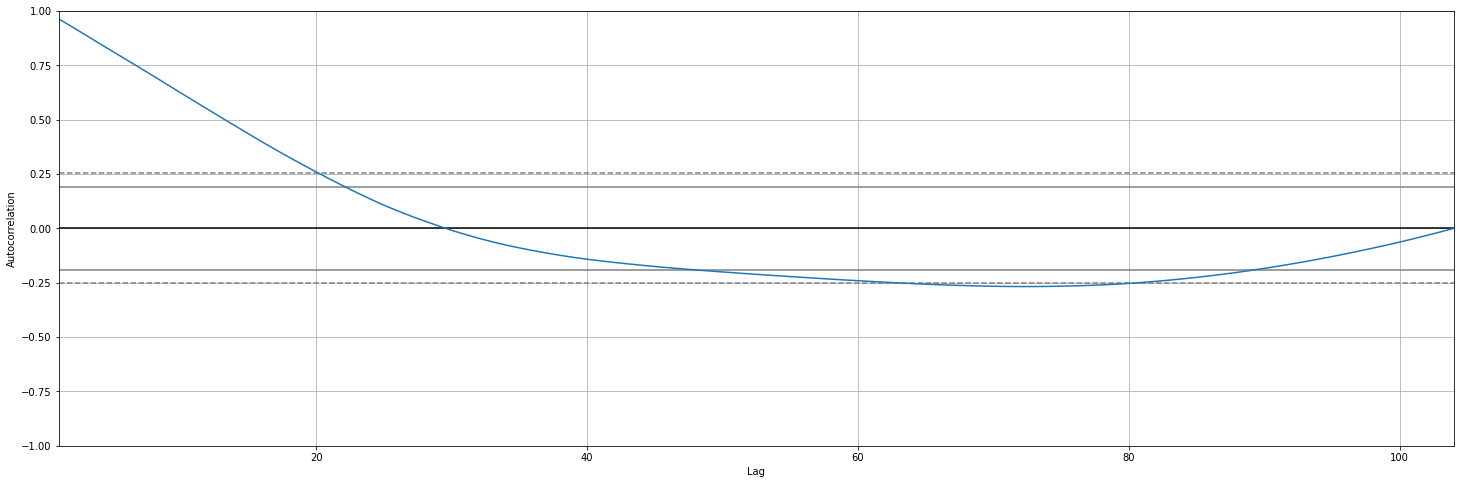

In [0]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(25,8))
autocorrelation_plot(datewise["Confirmed"])

In [0]:
print("Results of Dickey-Fuller test for Original Time Series")
dftest = adfuller(model_train["Confirmed"], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


Results of Dickey-Fuller test for Original Time Series
Test Statistic                 1
p-value                        1
#Lags Used                    12
Number of Observations Used   80
Critical Value (1%)           -4
Critical Value (5%)           -3
Critical Value (10%)          -3
dtype: float64


In [0]:
log_series=np.log(model_train["Confirmed"])

In [0]:
log_series

Date
2020-01-22   -inf
2020-01-23   -inf
2020-01-24   -inf
2020-01-25   -inf
2020-01-26   -inf
             ... 
2020-04-19     12
2020-04-20     12
2020-04-21     12
2020-04-22     12
2020-04-23     12
Name: Confirmed, Length: 93, dtype: float64

In [0]:
df_confirmed=df